# Using Logistic regression and K- Nearest Neighbours and Linear Regression to predict the output.

# Logistic regression:
            Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
# KNN Classification:
            In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.
# Linear Regression:
            In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

# Importing packages.

In [1]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm

In [2]:
train=pd.read_csv('Desktop/withoutnan.csv')

# Importing processed data and removing unwanted columns and rows.

In [3]:
del train['Unnamed: 0']

In [4]:
train

,id,is_duplicate,qid1fre,qid2fre,q1len,q2len,q1words,q2words,wordcommon,totalword,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,1,0,1,1,51,88,8,13,4,96,...,35.329720,36.151498,26.113995,-5.945439,-3.764533,-13.242300,-3.119115,-15.074568,1.750255,4.808958
1,3,0,1,1,50,65,11,9,0,90,...,16.037163,-3.360492,-0.675215,-8.187954,-0.426819,0.162989,-7.327550,18.178015,1.128700,1.379088
2,4,0,1,1,76,39,13,7,2,91,...,-0.380434,12.268896,6.165341,-13.538672,4.894008,0.155611,-5.257776,9.056422,13.048725,1.745268
3,5,1,1,1,86,90,16,16,8,240,...,24.143449,19.972768,28.181267,-25.501972,23.001883,1.883642,-17.123497,9.926241,13.280871,14.979537
4,8,0,1,1,35,37,8,8,6,64,...,8.336193,2.019299,-4.640802,0.279581,1.061505,10.414004,-2.804014,10.005005,0.892769,3.307342
5,9,0,1,1,60,49,9,9,3,81,...,19.132862,9.687498,-1.455972,-5.503664,19.651340,13.859298,-11.464403,-0.970975,0.896894,-0.545917
6,10,0,1,1,57,116,9,19,1,144,...,17.829798,39.661318,2.162672,-3.759375,17.590923,-2.598863,-32.714687,21.927518,20.397812,14.187281
7,12,1,1,1,36,39,7,8,6,56,...,4.933216,21.940921,6.257791,-5.428436,0.233901,4.791939,-7.761459,7.260280,9.907419,-1.181105
8,13,1,1,1,43,38,7,6,5,42,...,5.436416,6.635594,1.237909,0.129934,7.216300,-1.111819,-4.087631,-1.823663,-0.871670,-0.639762
9,14,0,1,1,141,140,29,29,20,484,...,22.741162,40.804370,6.412092,-10.953310,21.988174,2.113975,-37.976355,14.675033,13.152643,14.334592


In [5]:
train=train.dropna(axis=0)

In [6]:
train.to_csv('Desktop/withoutnan.csv')

KeyboardInterrupt: 

# Spliitting our data for training and testing to avoid data leakage.

In [7]:
y=train['is_duplicate']
X=train.drop('is_duplicate',axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

In [10]:
from sklearn.linear_model import LogisticRegression

# Application of logistic regression.

In [7]:
lgregressor=LogisticRegression()

In [8]:
lgregressor.fit(X_train,y_train)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
lgy_pred = lgregressor.predict(X_test)  

# Analysis of predicted data.

In [10]:
len(lgy_pred)

89402

In [11]:
lgypre=pd.DataFrame(lgy_pred)

In [12]:
lgyact=pd.DataFrame(y_test)

In [13]:
lgyact.columns=['actual']
lgyact.index=range(89402)

In [14]:
lgtotal=pd.concat([lgyact,lgypre],axis=1)

In [15]:
lgtotal.columns=['actual','predicted']

In [16]:
lgtotal

,actual,predicted
0,0,1
1,1,1
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


# Determining the logloss and confsion matrix for the predicted values.

In [17]:
from sklearn.metrics import log_loss as lg
lglogloss=lg(lgtotal["actual"],lgtotal["predicted"])
lglogloss

9.616263937534487

In [25]:
from sklearn.metrics import confusion_matrix

In [19]:
lga=confusion_matrix(lgtotal['actual'],lgtotal['predicted'])

In [20]:
lga

array([[45652, 10687],
       [14204, 18859]], dtype=int64)

In [21]:
lgaccuracy=(lga[0][0]+lga[1][1])/(lga[0][0]+lga[0][1]+lga[1][0]+lga[1][1])

In [22]:
lgaccuracy*100

72.15834097671193

In [23]:
import seaborn as sns

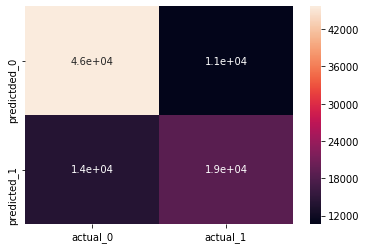

In [24]:
sns.heatmap(lga,annot=True,xticklabels=['actual_0','actual_1'],yticklabels=['predictded_0','predicted_1'])
plt.show()

# Using the KNN to predict the output.

## Determining the value of n-neighbours with best accuracy.

In [40]:
x=[]
for i in tqdm(range(1,21)):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    from sklearn import metrics 
    y=metrics.accuracy_score(y_test, y_pred)
    x.append(y)

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:00:05<00:00, 190.18s/it]


In [42]:
knn_acc=x

In [60]:
x

[0.5636451086105456,
 0.6119997315496297,
 0.5723697456432743,
 0.6054674392071766,
 0.577168296011275,
 0.6050423927876334,
 0.581709581441131,
 0.6028612335294512,
 0.5841703765016443,
 0.6040580747634281,
 0.5886781056352207,
 0.6036665846401646,
 0.5890360394622044,
 0.6050871345160064,
 0.5924028545222702,
 0.6050983199480996,
 0.5920896624236595,
 0.605299657725778,
 0.5940918547683497,
 0.6047292006890226]

In [45]:
knn_acc=pd.DataFrame(knn_acc)

In [49]:
knn_acc.columns=['accuracies']

In [51]:
n_nei=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
n_nei=pd.DataFrame(n_nei)

In [55]:
knn_accuracy=pd.concat([n_nei,knn_acc],axis=1)

In [57]:
knn_accuracy.columns=['n_neigh','accuracy']

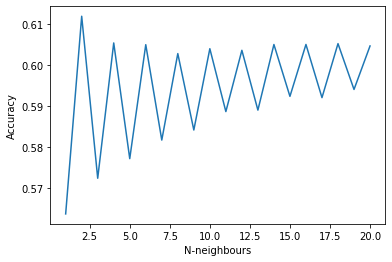

In [59]:
plt.plot(knn_accuracy['n_neigh'],knn_accuracy['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('N-neighbours')
plt.show()

## As we observe that at n=2 i.e if we choose to vote according to 2 nearest neighbours, we obtain the best accuracy.

# So the logloss and confusion matrix obtained for knn with n neighbours value =2 is...

In [25]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)

In [26]:
knnpredicted=pd.DataFrame(knnpred)
knnactual=pd.DataFrame(y_test)
knnactual.index=range(89402)
knntotal=pd.concat([knnactual,knnpredicted],axis=1)
knntotal.columns=['actual','predicted']

In [27]:
knlg=lg(knntotal['actual'],knntotal['predicted'])
knlg

13.451390056760218

In [28]:
knncon=confusion_matrix(knntotal['actual'],knntotal['predicted'])
knncon

array([[43761, 12578],
       [22240, 10823]], dtype=int64)

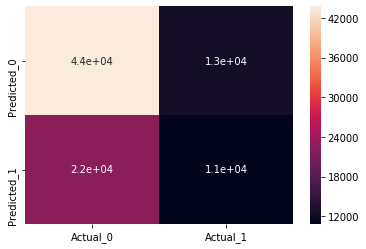

In [29]:
sns.heatmap(knncon,annot=True,xticklabels=('Actual_0','Actual_1'),yticklabels=('Predicted_0','Predicted_1'))
plt.show()

## We observe that the accuracy of the knn classifier is not as good as Logistic regression.

# Using Linear Regression to predict output.

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
liregressor=LinearRegression()

In [37]:
liregressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
liy_pred=liregressor.predict(X_test)

In [40]:
lipredval=liy_pred
for i in tqdm(range(0,len(liy_pred))):
            if lipredval[i]>0.75:
                lipredval[i]=1
            else:
                lipredval[i]=0
lipredval            

100%|██████████| 89402/89402 [00:00<00:00, 620929.24it/s]


array([1., 0., 0., ..., 0., 0., 1.])

In [41]:
lipredval=pd.DataFrame(lipredval)
y_test=pd.DataFrame(y_test)
y_test.index=range(89402)
litotal=pd.concat([y_test,lipredval],axis=1)
litotal.columns=['actual','predicted']
litotal.head()

,actual,predicted
0,0,1.0
1,1,0.0
2,1,0.0
3,0,0.0
4,0,0.0


In [43]:
lilog=lg(litotal['actual'],litotal['predicted'])
lilog

11.256156261513219

In [44]:
liconfusion=confusion_matrix(litotal['actual'],litotal['predicted'])
liconfusion

array([[54972,  1367],
       [27769,  5294]], dtype=int64)

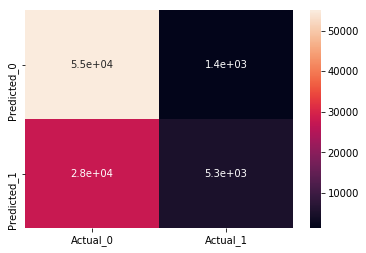

In [48]:
sns.heatmap(liconfusion,xticklabels=('Actual_0','Actual_1'),yticklabels=('Predicted_0','Predicted_1'),annot=True)
plt.show()

In [49]:
liaccuracy=(54972+5294)/(54972+5294+1367+27769)
liaccuracy

0.674101250531308

# We observe that the accuracy is good enough and number of 'true-false' values have decreased. 

# The probabilities of 'is_duplicate'=1 is obtained.

In [35]:
liregressor.coef_

array([-1.22647681e+07,  1.22647681e+07,  6.65915541e-05,  6.65915523e-05,
        6.16148924e-04,  2.72685809e-03,  2.15215586e-02,  5.32678039e-03,
       -1.06717812e-02, -7.03160907e-06,  1.99540961e+00,  1.33183104e-04,
        2.13162821e-13,  1.30302206e-01,  5.88890809e-02, -4.40511888e-02,
       -3.80590923e-01,  1.21256109e-01, -3.78847789e-01,  7.95123690e-02,
        3.70501756e-02, -1.08774453e-03, -1.64938167e-02,  1.40436345e-03,
        4.49207539e-03, -1.39278204e-03,  4.04561334e-03, -4.54274713e-01,
        8.64747129e-05, -1.35453488e-04,  3.51694392e-05, -7.00985473e-05,
        1.08662076e-04,  1.24342681e-04, -4.50253155e-05,  1.20274765e-04,
        9.42721334e-05,  1.68267378e-04, -2.76196453e-05,  7.23718837e-05,
       -1.97994920e-04,  1.42589410e-04, -1.34392030e-04,  9.84147259e-05,
        2.62888109e-04, -5.51825846e-05,  5.63649990e-05,  1.21123797e-04,
       -2.01657785e-04,  2.96909038e-05, -2.57978502e-05, -1.20078449e-04,
        1.90166012e-04, -

# Finding the mean squared error and Variance for the predicted values  using linear regression model.

## Mean Squared Error= ((sum of predicted values)**2)/number of values.
## Varience= (summation of difference between each value to mean value)**2/ Total number of values

In [37]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, liy_pred))

Mean squared error: 0.16


In [38]:
print('Variance score: %.2f' % r2_score(y_test, liy_pred))

Variance score: 0.30


# Using linear regression to predict the output and check the accuracy of this model.

## Using GridSearchCV to find the best parameter.

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  1e-05 The log loss is: 0.6588626493346741


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  0.0001 The log loss is: 0.6588626493346741


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  0.001 The log loss is: 0.6588626493346741


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  0.01 The log loss is: 0.6200403222432797


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  0.1 The log loss is: 0.584682335842416


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  1 The log loss is: 0.5874825300694172


C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


For values of alpha =  10 The log loss is: 0.6109516987936005


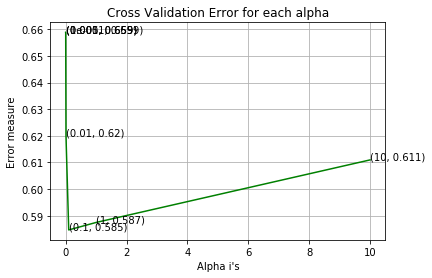

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html # -----------------------------# default parameters # SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, # shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, # class_weight=None, warm_start=False, average=False, n_iter=None)
# some of methods # fit(X, y[, coef_init, intercept_init, …]) Fit linear model with Stochastic Gradient Descent. # predict(X)    Predict class labels for samples in X.
 
log_error_array=[] 
for i in alpha:    
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,tol=i)    
    clf.fit(X_train, y_train)    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid",cv=2)    
    sig_clf.fit(X_train, y_train)    
    predict_y = sig_clf.predict_proba(X_test)    
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))    
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
fig, ax = plt.subplots() 
ax.plot(alpha, log_error_array,c='g') 
for i, txt in enumerate(np.round(log_error_array,3)):    
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i])) 
plt.grid() 
plt.title("Cross Validation Error for each alpha") 
plt.xlabel("Alpha i's") 
plt.ylabel("Error measure") 
plt.show()
 
best_alpha = np.argmin(log_error_array) 
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,tol=alpha[best_alpha]) 
clf.fit(X_train, y_train) 
sig_clf = CalibratedClassifierCV(clf, method="sigmoid",cv=2) 
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train) 
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)) 
predict_y = sig_clf.predict_proba(X_test) 
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)) 
predicted_y =np.argmax(predict_y,axis=1) 
print("Total number of data points :", len(predicted_y)) 
plot_confusion_matrix(y_test, predicted_y)


# We observe the best value for our parameter is 0.1. So using this value to our model.

In [13]:
clf = SGDClassifier(alpha=0.1, penalty='l2', loss='log', random_state=42)    
clf.fit(X_train, y_train) 

C:\Users\vivek\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
ligypred=clf.predict(X_test)

In [22]:
y_test

165367    0
209627    1
147567    1
157138    0
51619     0
89400     0
201136    0
78823     0
210148    1
64215     1
67439     0
260166    0
136685    0
256137    1
6832      1
1105      1
239708    0
27656     0
205734    0
44775     0
214383    1
43515     0
62418     1
89058     1
113310    1
10245     1
136925    1
192322    0
264147    1
185088    0
         ..
156415    0
245831    1
7869      0
114216    1
3948      0
154983    0
46324     1
39940     1
184671    1
161448    0
36374     1
120479    0
34720     0
199836    1
106402    0
169315    0
34439     0
247697    1
204770    0
8457      0
32906     0
133709    0
89176     1
183478    0
192635    0
41871     0
179244    1
1714      0
76199     1
5053      1
Name: is_duplicate, Length: 89402, dtype: int64

# Determination of logloss and Confusion Matrix for our model.

In [23]:
ligpredicted=pd.DataFrame(ligypred)
ligactual=pd.DataFrame(y_test)
ligactual.index=range(89402)
ligtotal=pd.concat([ligactual,ligpredicted],axis=1)
ligtotal.columns=['actual','predicted']

In [26]:
from sklearn.metrics import log_loss as lg
liglg=lg(ligtotal['actual'],ligtotal['predicted'])
liglg

20.523910935973912

In [27]:
ligcon=confusion_matrix(ligtotal['actual'],ligtotal['predicted'])
ligcon

array([[ 5403, 50936],
       [ 2188, 30875]], dtype=int64)

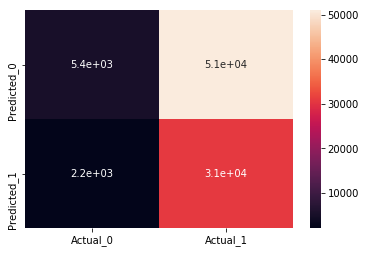

In [28]:
sns.heatmap(ligcon,annot=True,xticklabels=('Actual_0','Actual_1'),yticklabels=('Predicted_0','Predicted_1'))
plt.show()

In [29]:
ligaccuracy=(5403+30875)/(5403+30875+2188+50936)
ligaccuracy

0.4057851054786246

# The overall accuracy of this is least compared to the other models.